Epoch 1/5
338/338 [==============================] - 8s 16ms/step - loss: 0.4738 - accuracy: 0.8623 - val_loss: 0.1975 - val_accuracy: 0.9417
Epoch 2/5
338/338 [==============================] - 6s 18ms/step - loss: 0.1903 - accuracy: 0.9457 - val_loss: 0.1136 - val_accuracy: 0.9700
Epoch 3/5
338/338 [==============================] - 7s 20ms/step - loss: 0.1192 - accuracy: 0.9650 - val_loss: 0.1238 - val_accuracy: 0.9650
Epoch 4/5
338/338 [==============================] - 6s 19ms/step - loss: 0.0844 - accuracy: 0.9765 - val_loss: 0.0980 - val_accuracy: 0.9725
Epoch 5/5
375/375 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1184
           1       0.99      0.99      0.99      1348
           2       1.00      0.98      0.99      1191
           3       0.98      0.99      0.99      1227
           4       0.97      1.00      0.99      1169
           5       0.98      0.99      0.9

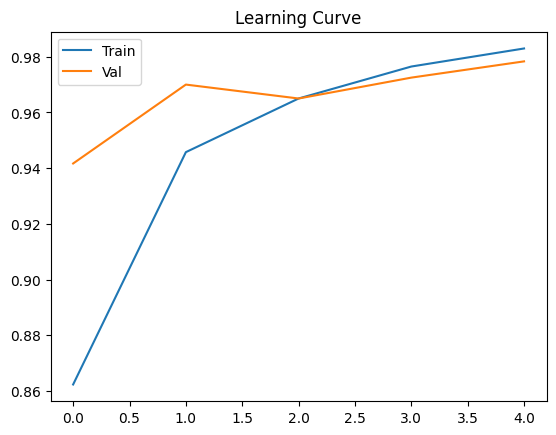

In [ ]:
import numpy as np
import tensorflow as tf
from model import build_model
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

idx = 0 # El índice único por integrante (0 a 4)
data = np.load(f"Division/Dataprophet_PT{idx}.npz")
x_local, y_local = data["x"], data["y"]

model = build_model()
history = model.fit(x_local, y_local, epochs=5, validation_split=0.1)

#se guarda en .h5 
model.save_weights(f"model_weights_{idx}.h5")

y_pred = model.predict(x_local)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_local, y_pred_classes))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Learning Curve")
plt.legend(["Train", "Val"])
plt.show()
